In [1]:
from runner2 import Experiment

In [32]:
exp = Experiment(559, 12, 6)

2021-07-14 08:17:07.035 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_train_0_12_6.pkl
2021-07-14 08:17:07.156 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'train', 'train_ds_size': 0, 'window_size': 12, 'prediction_horizon': 6, 'minimal_features': False}


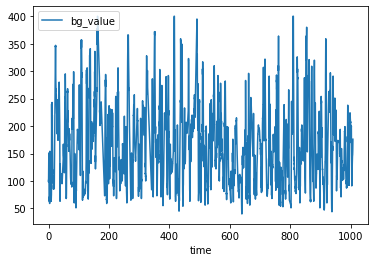

2021-07-14 08:17:07.810 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing pickle file. Continuing...
2021-07-14 08:17:07.811 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_train_0_12_6.pkl


,bg_value__variance_larger_than_standard_deviation,bg_value__has_duplicate_max,bg_value__has_duplicate_min,bg_value__has_duplicate,bg_value__sum_values,bg_value__abs_energy,bg_value__mean_abs_change,bg_value__mean_change,bg_value__mean_second_derivative_central,bg_value__median,bg_value__mean,bg_value__length,bg_value__standard_deviation,bg_value__variation_coefficient,bg_value__variance,bg_value__skewness,bg_value__kurtosis,bg_value__root_mean_square,bg_value__absolute_sum_of_changes,bg_value__longest_strike_below_mean,bg_value__longest_strike_above_mean,bg_value__count_above_mean,bg_value__count_below_mean,bg_value__last_location_of_maximum,bg_value__first_location_of_maximum,bg_value__last_location_of_minimum,bg_value__first_location_of_minimum,bg_value__percentage_of_reoccurring_values_to_all_values,bg_value__percentage_of_reoccurring_datapoints_to_all_datapoints,bg_value__sum_of_reoccurring_values,bg_value__sum_of_reoccurring_data_points,bg_value__ratio_value_number_to_time_series_length,bg_value__sample_entropy,bg_value__maximum,bg_value__minimum,bg_value__benford_correlation,bg_value__time_reversal_asymmetry_statistic__lag_1,bg_value__time_reversal_asymmetry_statistic__lag_2,bg_value__time_reversal_asymmetry_statistic__lag_3,bg_value__c3__lag_1,bg_value__c3__lag_2,bg_value__c3__lag_3,bg_value__cid_ce__normalize_True,bg_value__cid_ce__normalize_False,bg_value__symmetry_looking__r_0.0,bg_value__symmetry_looking__r_0.05,bg_value__symmetry_looking__r_0.1,bg_value__symmetry_looking__r_0.15000000000000002,bg_value__symmetry_looking__r_0.2,bg_value__symmetry_looking__r_0.25,bg_value__symmetry_looking__r_0.30000000000000004,bg_value__symmetry_looking__r_0.35000000000000003,bg_value__symmetry_looking__r_0.4,bg_value__symmetry_looking__r_0.45,bg_value__symmetry_looking__r_0.5,bg_value__symmetry_looking__r_0.55,bg_value__symmetry_looking__r_0.6000000000000001,bg_value__symmetry_looking__r_0.65,bg_value__symmetry_looking__r_0.7000000000000001,bg_value__symmetry_looking__r_0.75,bg_value__symmetry_looking__r_0.8,bg_value__symmetry_looking__r_0.8500000000000001,bg_value__symmetry_looking__r_0.9,bg_value__symmetry_looking__r_0.9500000000000001,bg_value__large_standard_deviation__r_0.05,bg_value__large_standard_deviation__r_0.1,bg_value__large_standard_deviation__r_0.15000000000000002,bg_value__large_standard_deviation__r_0.2,bg_value__large_standard_deviation__r_0.25,bg_value__large_standard_deviation__r_0.30000000000000004,bg_value__large_standard_deviation__r_0.35000000000000003,bg_value__large_standard_deviation__r_0.4,bg_value__large_standard_deviation__r_0.45,bg_value__large_standard_deviation__r_0.5,bg_value__large_standard_deviation__r_0.55,bg_value__large_standard_deviation__r_0.6000000000000001,bg_value__large_standard_deviation__r_0.65,bg_value__large_standard_deviation__r_0.7000000000000001,bg_value__large_standard_deviation__r_0.75,bg_value__large_standard_deviation__r_0.8,bg_value__large_standard_deviation__r_0.8500000000000001,bg_value__large_standard_deviation__r_0.9,bg_value__large_standard_deviation__r_0.9500000000000001,bg_value__quantile__q_0.1,bg_value__quantile__q_0.2,bg_value__quantile__q_0.3,bg_value__quantile__q_0.4,bg_value__quantile__q_0.6,bg_value__quantile__q_0.7,bg_value__quantile__q_0.8,bg_value__quantile__q_0.9,bg_value__autocorrelation__lag_0,bg_value__autocorrelation__lag_1,bg_value__autocorrelation__lag_2,bg_value__autocorrelation__lag_3,bg_value__autocorrelation__lag_4,bg_value__autocorrelation__lag_5,bg_value__autocorrelation__lag_6,bg_value__autocorrelation__lag_7,bg_value__autocorrelation__lag_8,bg_value__autocorrelation__lag_9,"bg_value__agg_autocorrelation__f_agg_""mean""__maxlag_40","bg_value__agg_autocorrelation__f_agg_""median""__maxlag_40","bg_value__agg_autocorrelation__f_agg_""var""__maxlag_40",bg_value__partial_autocorrelation__lag_0,bg_value__partial_autocorrelation__lag_1,bg_value__partial_autocorrelation__lag_2,bg_value__partial_autocorrelation__lag_3,bg_value__partial_autocorrelation__

In [33]:
exp.create_train_dataframe()
tdf = exp.train_df
tdf

In [34]:
tol = tdf['end_time']
tol

0           0.92
1           1.00
2           1.08
3           1.17
4           1.25
          ...   
10774    1005.82
10775    1005.90
10776    1005.98
10777    1006.07
10778    1006.15
Name: end_time, Length: 10779, dtype: float64

In [35]:
from datetime import datetime
from datetime import timedelta

In [36]:
time_str = '07/12/2021 01:17:00'
date_format_str = '%d/%m/%Y %H:%M:%S'

In [37]:
given_time = datetime.strptime(time_str, date_format_str)

In [38]:
print('Given timestamp: ', given_time)

Given timestamp:  2021-12-07 01:17:00


In [39]:
final_time = given_time + timedelta(hours=(0.92))
print('Final Time ', final_time)

Final Time  2021-12-07 02:12:12


In [40]:
tol.iloc[0]

0.92

In [41]:
def rounder(t):
    if t.second >= 30:
        return t.replace(second=0, minute=t.minute+1)
    else:
        return t.replace(second=0)


ltol_array = []
target_time  = []
for index, value in tol.items():
    last = given_time + timedelta(hours=(value))
    last = rounder(last)
    target = last + timedelta(minutes=30)
    ltol_array.append(last)
    target_time.append(target)
# ltol_array


In [42]:
import pandas as pd

ltol = pd.Series(ltol_array)
ltol

0       2021-12-07 02:12:00
1       2021-12-07 02:17:00
2       2021-12-07 02:22:00
3       2021-12-07 02:27:00
4       2021-12-07 02:32:00
                ...        
10774   2022-01-17 23:06:00
10775   2022-01-17 23:11:00
10776   2022-01-17 23:16:00
10777   2022-01-17 23:21:00
10778   2022-01-17 23:26:00
Length: 10779, dtype: datetime64[ns]

In [43]:
tt = pd.Series(target_time)
tt

0       2021-12-07 02:42:00
1       2021-12-07 02:47:00
2       2021-12-07 02:52:00
3       2021-12-07 02:57:00
4       2021-12-07 03:02:00
                ...        
10774   2022-01-17 23:36:00
10775   2022-01-17 23:41:00
10776   2022-01-17 23:46:00
10777   2022-01-17 23:51:00
10778   2022-01-17 23:56:00
Length: 10779, dtype: datetime64[ns]

In [53]:
df = pd.DataFrame({'TOL':tol, 'LTOL':ltol, 'TT':tt, 'VALUE': tdf['label']})
df

,TOL,LTOL,TT,VALUE
0,0.92,2021-12-07 02:12:00,2021-12-07 02:42:00,115
1,1.00,2021-12-07 02:17:00,2021-12-07 02:47:00,111
2,1.08,2021-12-07 02:22:00,2021-12-07 02:52:00,109
3,1.17,2021-12-07 02:27:00,2021-12-07 02:57:00,103
4,1.25,2021-12-07 02:32:00,2021-12-07 03:02:00,89
...,...,...,...,...
10774,1005.82,2022-01-17 23:06:00,2022-01-17 23:36:00,161
10775,1005.90,2022-01-17 23:11:00,2022-01-17 23:41:00,164
10776,1005.98,2022-01-17 23:16:00,2022-01-17 23:46:00,168
10777,1006.07,2022-01-17 23:21:00,2022-01-17 23:51:00,172


In [54]:
df[200:300]

,TOL,LTOL,TT,VALUE
200,17.58,2021-12-07 18:52:00,2021-12-07 19:22:00,94
201,17.67,2021-12-07 18:57:00,2021-12-07 19:27:00,101
202,17.75,2021-12-07 19:02:00,2021-12-07 19:32:00,104
203,17.83,2021-12-07 19:07:00,2021-12-07 19:37:00,97
204,17.92,2021-12-07 19:12:00,2021-12-07 19:42:00,96
205,18.00,2021-12-07 19:17:00,2021-12-07 19:47:00,96
206,18.08,2021-12-07 19:22:00,2021-12-07 19:52:00,96
207,18.17,2021-12-07 19:27:00,2021-12-07 19:57:00,93
208,18.25,2021-12-07 19:32:00,2021-12-07 20:02:00,86
209,18.33,2021-12-07 19:37:00,2021-12-07 20:07:00,86


In [57]:
problematic_points = []
old_value = 0
for index, row in df.iterrows():

    if (row['TOL']-old_value) > 1:
        print(index, row['TOL'], old_value)
        problematic_points.append(index)
    old_value=row['TOL']
    
    
problematic_points

217 22.78 18.92
1175 103.95 102.53
1798 160.03 156.78
1824 168.32 162.12
1894 185.27 174.07
2306 220.93 219.52
2589 246.18 244.77
2731 259.1 257.93
3077 293.52 287.85
3219 306.35 305.27
3477 340.83 327.78
3547 347.83 346.58
3689 361.83 359.58
4832 462.0 458.5
5100 490.72 484.58
5170 497.88 496.47
6461 607.88 605.38
6757 637.65 632.72
7190 674.73 673.65
7364 690.65 689.15
7858 734.07 732.57
8011 749.4 746.73
8283 773.82 771.98
8304 779.05 775.48
8510 801.8 796.63
8738 822.22 820.72
8989 844.97 843.05
9418 881.97 880.63
9904 926.82 922.8
10268 962.98 957.07


[217,
 1175,
 1798,
 1824,
 1894,
 2306,
 2589,
 2731,
 3077,
 3219,
 3477,
 3547,
 3689,
 4832,
 5100,
 5170,
 6461,
 6757,
 7190,
 7364,
 7858,
 8011,
 8283,
 8304,
 8510,
 8738,
 8989,
 9418,
 9904,
 10268]

In [58]:
for point in problematic_points:
    for i in range(-6,6):
        df.drop(point+i, inplace=True)
df[200:300]

,TOL,LTOL,TT,VALUE
200,17.58,2021-12-07 18:52:00,2021-12-07 19:22:00,94
201,17.67,2021-12-07 18:57:00,2021-12-07 19:27:00,101
202,17.75,2021-12-07 19:02:00,2021-12-07 19:32:00,104
203,17.83,2021-12-07 19:07:00,2021-12-07 19:37:00,97
204,17.92,2021-12-07 19:12:00,2021-12-07 19:42:00,96
205,18.00,2021-12-07 19:17:00,2021-12-07 19:47:00,96
206,18.08,2021-12-07 19:22:00,2021-12-07 19:52:00,96
207,18.17,2021-12-07 19:27:00,2021-12-07 19:57:00,93
208,18.25,2021-12-07 19:32:00,2021-12-07 20:02:00,86
209,18.33,2021-12-07 19:37:00,2021-12-07 20:07:00,86


In [15]:
df.set_index('TT', inplace=True)


In [16]:
df

,TOL,LTOL,VALUE
TT,,,
2021-12-07 02:42:00,0.92,2021-12-07 02:12:00,115
2021-12-07 02:47:00,1.00,2021-12-07 02:17:00,111
2021-12-07 02:52:00,1.08,2021-12-07 02:22:00,109
2021-12-07 02:57:00,1.17,2021-12-07 02:27:00,103
2021-12-07 03:02:00,1.25,2021-12-07 02:32:00,89
...,...,...,...
2022-01-17 23:36:00,1005.82,2022-01-17 23:06:00,161
2022-01-17 23:41:00,1005.90,2022-01-17 23:11:00,164
2022-01-17 23:46:00,1005.98,2022-01-17 23:16:00,168


In [26]:
df[200:300]

,TOL,LTOL,VALUE
TT,,,
2021-12-07 19:22:00,17.58,2021-12-07 18:52:00,94
2021-12-07 19:27:00,17.67,2021-12-07 18:57:00,101
2021-12-07 19:32:00,17.75,2021-12-07 19:02:00,104
2021-12-07 19:37:00,17.83,2021-12-07 19:07:00,97
2021-12-07 19:42:00,17.92,2021-12-07 19:12:00,96
2021-12-07 19:47:00,18.00,2021-12-07 19:17:00,96
2021-12-07 19:52:00,18.08,2021-12-07 19:22:00,96
2021-12-07 19:57:00,18.17,2021-12-07 19:27:00,93
2021-12-07 20:02:00,18.25,2021-12-07 19:32:00,86


2021-12-08 00:34:00 22.78 18.92
2021-12-11 09:44:00 103.95 102.53
2021-12-13 17:49:00 160.03 156.78
2021-12-14 02:06:00 168.32 162.12
2021-12-14 19:03:00 185.27 174.07
2021-12-16 06:43:00 220.93 219.52
2021-12-17 07:58:00 246.18 244.77
2021-12-17 20:53:00 259.1 257.93
2021-12-19 07:18:00 293.52 287.85
2021-12-19 20:08:00 306.35 305.27
2021-12-21 06:37:00 340.83 327.78
2021-12-21 13:37:00 347.83 346.58
2021-12-22 03:37:00 361.83 359.58
2021-12-26 07:47:00 462.0 458.5
2021-12-27 12:30:00 490.72 484.58
2021-12-27 19:40:00 497.88 496.47
2022-01-01 09:40:00 607.88 605.38
2022-01-02 15:26:00 637.65 632.72
2022-01-04 04:31:00 674.73 673.65
2022-01-04 20:26:00 690.65 689.15
2022-01-06 15:51:00 734.07 732.57
2022-01-07 07:11:00 749.4 746.73
2022-01-08 07:36:00 773.82 771.98
2022-01-08 12:50:00 779.05 775.48
2022-01-09 11:35:00 801.8 796.63
2022-01-10 08:00:00 822.22 820.72
2022-01-11 06:45:00 844.97 843.05
2022-01-12 19:45:00 881.97 880.63
2022-01-14 16:36:00 926.82 922.8
2022-01-16 04:46:00 96

[Timestamp('2021-12-08 00:34:00'),
 Timestamp('2021-12-11 09:44:00'),
 Timestamp('2021-12-13 17:49:00'),
 Timestamp('2021-12-14 02:06:00'),
 Timestamp('2021-12-14 19:03:00'),
 Timestamp('2021-12-16 06:43:00'),
 Timestamp('2021-12-17 07:58:00'),
 Timestamp('2021-12-17 20:53:00'),
 Timestamp('2021-12-19 07:18:00'),
 Timestamp('2021-12-19 20:08:00'),
 Timestamp('2021-12-21 06:37:00'),
 Timestamp('2021-12-21 13:37:00'),
 Timestamp('2021-12-22 03:37:00'),
 Timestamp('2021-12-26 07:47:00'),
 Timestamp('2021-12-27 12:30:00'),
 Timestamp('2021-12-27 19:40:00'),
 Timestamp('2022-01-01 09:40:00'),
 Timestamp('2022-01-02 15:26:00'),
 Timestamp('2022-01-04 04:31:00'),
 Timestamp('2022-01-04 20:26:00'),
 Timestamp('2022-01-06 15:51:00'),
 Timestamp('2022-01-07 07:11:00'),
 Timestamp('2022-01-08 07:36:00'),
 Timestamp('2022-01-08 12:50:00'),
 Timestamp('2022-01-09 11:35:00'),
 Timestamp('2022-01-10 08:00:00'),
 Timestamp('2022-01-11 06:45:00'),
 Timestamp('2022-01-12 19:45:00'),
 Timestamp('2022-01-

<AxesSubplot:xlabel='TT'>

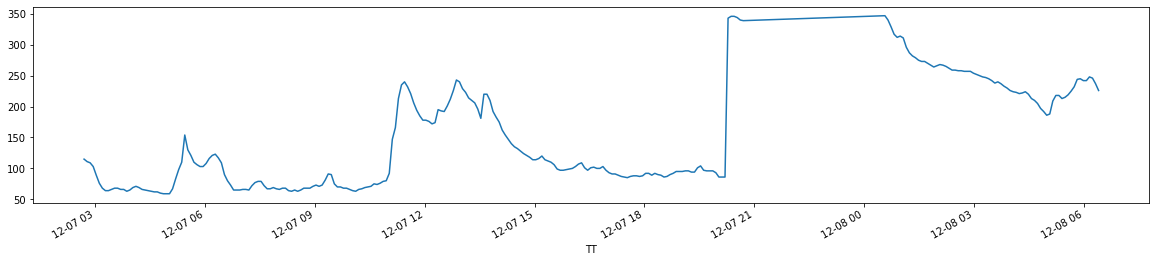

In [71]:
df['VALUE'][:288].plot(figsize=(20,4))

In [72]:
ind = df.index
ind

DatetimeIndex(['2021-12-07 02:42:00', '2021-12-07 02:47:00',
               '2021-12-07 02:52:00', '2021-12-07 02:57:00',
               '2021-12-07 03:02:00', '2021-12-07 03:07:00',
               '2021-12-07 03:12:00', '2021-12-07 03:17:00',
               '2021-12-07 03:22:00', '2021-12-07 03:27:00',
               ...
               '2022-01-17 23:11:00', '2022-01-17 23:16:00',
               '2022-01-17 23:21:00', '2022-01-17 23:26:00',
               '2022-01-17 23:31:00', '2022-01-17 23:36:00',
               '2022-01-17 23:41:00', '2022-01-17 23:46:00',
               '2022-01-17 23:51:00', '2022-01-17 23:56:00'],
              dtype='datetime64[ns]', name='TT', length=10779, freq=None)

In [73]:
ind[0]

Timestamp('2021-12-07 02:42:00')

In [74]:
ind[-1]

Timestamp('2022-01-17 23:56:00')

In [75]:
idx = pd.date_range(ind[0], ind[-1], freq='5T')

In [76]:
idx

DatetimeIndex(['2021-12-07 02:42:00', '2021-12-07 02:47:00',
               '2021-12-07 02:52:00', '2021-12-07 02:57:00',
               '2021-12-07 03:02:00', '2021-12-07 03:07:00',
               '2021-12-07 03:12:00', '2021-12-07 03:17:00',
               '2021-12-07 03:22:00', '2021-12-07 03:27:00',
               ...
               '2022-01-17 23:07:00', '2022-01-17 23:12:00',
               '2022-01-17 23:17:00', '2022-01-17 23:22:00',
               '2022-01-17 23:27:00', '2022-01-17 23:32:00',
               '2022-01-17 23:37:00', '2022-01-17 23:42:00',
               '2022-01-17 23:47:00', '2022-01-17 23:52:00'],
              dtype='datetime64[ns]', length=12063, freq='5T')

In [77]:
df2 = df.reindex(idx, fill_value=None)

In [83]:
idx2 = pd.date_range(ind[0], ind[-1], freq='T')
idx2

DatetimeIndex(['2021-12-07 02:42:00', '2021-12-07 02:43:00',
               '2021-12-07 02:44:00', '2021-12-07 02:45:00',
               '2021-12-07 02:46:00', '2021-12-07 02:47:00',
               '2021-12-07 02:48:00', '2021-12-07 02:49:00',
               '2021-12-07 02:50:00', '2021-12-07 02:51:00',
               ...
               '2022-01-17 23:47:00', '2022-01-17 23:48:00',
               '2022-01-17 23:49:00', '2022-01-17 23:50:00',
               '2022-01-17 23:51:00', '2022-01-17 23:52:00',
               '2022-01-17 23:53:00', '2022-01-17 23:54:00',
               '2022-01-17 23:55:00', '2022-01-17 23:56:00'],
              dtype='datetime64[ns]', length=60315, freq='T')

In [85]:
df3 = df.reindex(idx2, fill_value=None)
df3.head(20)

,TOL,LTOL,VALUE
2021-12-07 02:42:00,0.92,2021-12-07 02:12:00,115.0
2021-12-07 02:43:00,NaN,NaT,NaN
2021-12-07 02:44:00,NaN,NaT,NaN
2021-12-07 02:45:00,NaN,NaT,NaN
2021-12-07 02:46:00,NaN,NaT,NaN
2021-12-07 02:47:00,1.00,2021-12-07 02:17:00,111.0
2021-12-07 02:48:00,NaN,NaT,NaN
2021-12-07 02:49:00,NaN,NaT,NaN
2021-12-07 02:50:00,NaN,NaT,NaN
2021-12-07 02:51:00,NaN,NaT,NaN
